### Building Machine Learning Model on Life Expectancy data set

### Problem Statement: 

The ‘Life Expectancy’ dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. It is our aim to study how these various factors impact the average life expectancy in the given countries.

### Variable information

Country: Name of the country Status: Whether the country is Developed or Developing

Adult_Mortality: Mortality rate for age group 15-60 out of every 1000 individuals of the population

Infant_Deaths: Number of infant deaths per 1000 population

Hepatitis: Hepatitis B (HepB) immunization coverage for 1-year olds (Percentage)

Measles: Number of reported cases for measles per 1000 from population 

BMI: Average Body Mass Index for entire population 

Underfive_Deaths: Number of deaths under 5 years of age per 1000 population 

Polio: Polio (Pol3) immunization coverage for 1-year olds (Percentage)

Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1-year olds (Percentage)

HIV: Deaths per 1000 live births due to HIV/AIDS (0-4 years)

GDP: Gross Domestic Product per capita (in USD) 

Population: Population of the country 

Malnourished10_19: Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage) 

Malnourished5_9: Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

Income_Index: Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1) 

Schooling: Number of years of Schooling 

Life_Expectancy: Life Expectancy in age for the country

Build the full model, find the significant contributors and share the post model conclusions.

In [240]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
  
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from scipy
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats


In [241]:
df = pd.read_csv('Life expectancy.csv')
df.head(5)

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62.000000,65.000000,1154,19.100000,NaN,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,NaN,65.000000
1,Albania,Developing,8,0.000000,98.000000,0,57.200000,NaN,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21.000000,95.000000,63,59.500000,NaN,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335,66.000000,64.000000,118,23.300000,NaN,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Argentina,Developing,116,8.000000,94.000000,0,62.800000,NaN,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000


In [242]:
df.shape

(124, 18)

In [243]:
df.size

2232

In [244]:
df.dtypes

Country                object
Status                 object
Adult_Mortality         int64
Infant_Deaths         float64
Hepatitis             float64
Measles                 int64
 BMI                  float64
Underfive_Deaths      float64
Polio                   int64
Diphtheria              int64
 HIV                  float64
GDP                   float64
Population              int64
Malnourished10_19     float64
Malnourished5_9       float64
Income_Index          float64
Schooling             float64
Expected              float64
dtype: object

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       110 non-null    float64
 4   Hepatitis           119 non-null    float64
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    119 non-null    float64
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        121 non-null    float64
 16  Schoolin

### Removing Unwanted columns

In [246]:
df.drop(['Country'],axis=1,inplace=True)

In [247]:
df.shape

(124, 17)

### Outlier Analysis and Treatment

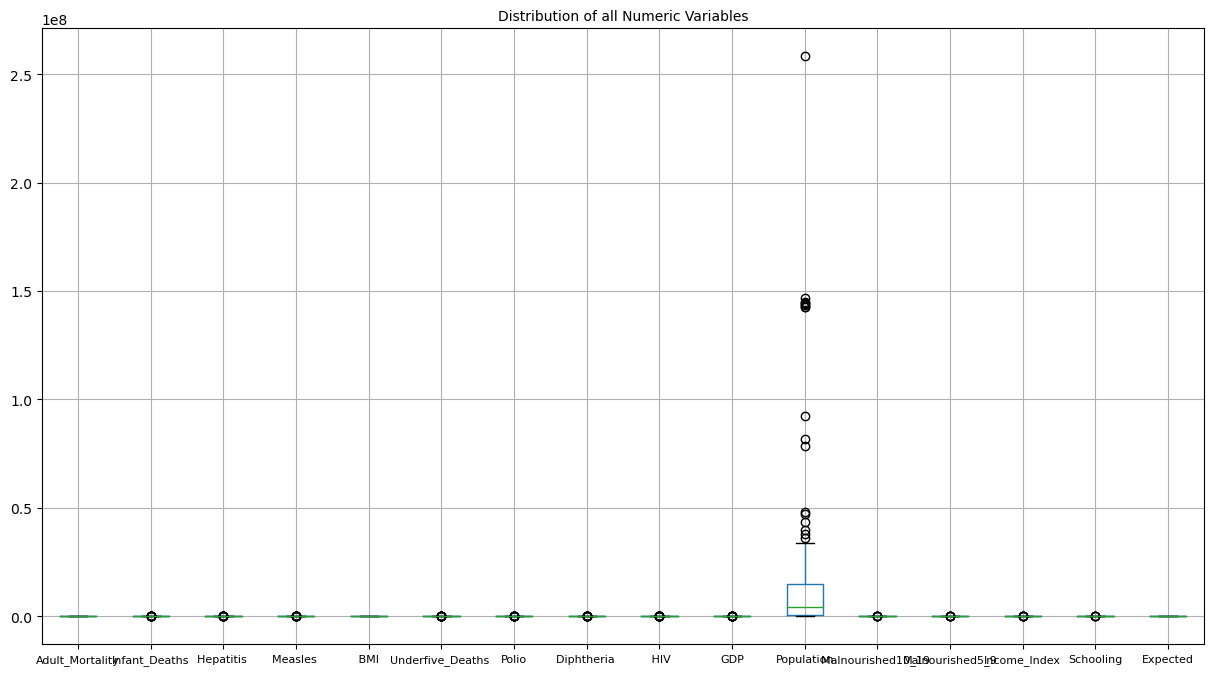

In [248]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 10)

# xticks() returns the x-axis ticks
plt.xticks (fontsize = 8)

plt.show()

In [249]:
# outlier percentage 

def outlier_percent(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((x < lower_bound) | (x > upper_bound)).sum()
    outliers_percentage = (outliers_count / len(x)) * 100
    return outliers_percentage

# Calculate outliers percentage for each numerical column
outliers_percentages = df.select_dtypes(include=['float64', 'int64']).apply(outlier_percent)

# Display the results
print("Outliers Percentage for Each Numerical Column:")
print(outliers_percentages)


Outliers Percentage for Each Numerical Column:
Adult_Mortality       0.000000
Infant_Deaths        10.483871
Hepatitis            13.709677
Measles              15.322581
 BMI                  0.000000
Underfive_Deaths     10.483871
Polio                12.903226
Diphtheria           13.709677
 HIV                 16.129032
GDP                   9.677419
Population           13.709677
Malnourished10_19     4.032258
Malnourished5_9       4.032258
Income_Index          4.838710
Schooling             3.225806
Expected              0.000000
dtype: float64


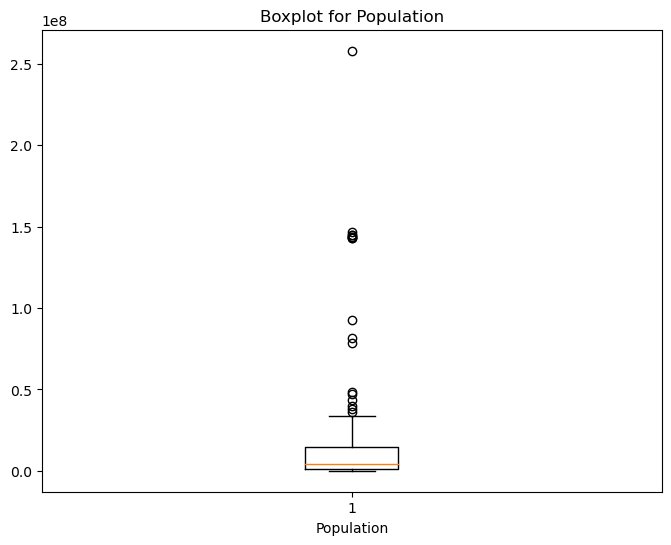

In [250]:
#Analyszing Population

plt.figure(figsize=(8, 6))
plt.boxplot(df['Population'])  # vert=False for horizontal boxplot

# Set plot labels and title
plt.xlabel('Population')
plt.title('Boxplot for Population')

# Show the plot
plt.show()

### Outlier analysis using Z-Score

In [251]:
def find_outlier_z_score(features, df):
    summary_outliers_df = pd.DataFrame()
    summary_outliers_data = {'Feature_Name':[], 'Count_Outliers':[], 'Percentage_Outliers':[]}

    for feature in features:
        z_scores = stats.zscore(df[feature])
        threshold = 3
        outliers_mask = (np.absolute(z_scores) > threshold)
        outliers_indices = np.column_stack(np.where(outliers_mask))
        feature_outliers_df = df.iloc[outliers_indices[:, 0]]

        summary_outliers_data['Feature_Name'].append(feature)
        summary_outliers_data['Count_Outliers'].append(feature_outliers_df.shape[0])
        summary_outliers_data['Percentage_Outliers'].append(np.round((feature_outliers_df.shape[0] / df[feature].shape[0]) * 100, 2))

    summary_outliers_df = pd.DataFrame(summary_outliers_data)
    summary_outliers_df = summary_outliers_df[summary_outliers_df['Count_Outliers'] != 0]
    summary_outliers_df.sort_values(by='Count_Outliers', ascending=False, inplace=True)

    return summary_outliers_df

def remove_outliers_z_score(features, df):
    for feature in features:
        z_scores = stats.zscore(df[feature])
        threshold = 3
        outliers_mask = (np.absolute(z_scores) > threshold)
        df = df[~outliers_mask]

    return df


In [257]:
features = df.columns.to_list()[1:]
summary_outliers_df = find_outlier_z_score(features, df=df.iloc[:, 1:])
summary_outliers_df

,Feature_Name,Count_Outliers,Percentage_Outliers
10,Population,8,6.450000
6,Polio,6,4.840000
8,HIV,6,4.840000
9,GDP,5,4.030000
3,Measles,4,3.230000
7,Diphtheria,4,3.230000
11,Malnourished10_19,3,2.420000
12,Malnourished5_9,3,2.420000


In [266]:
## Removing outliers in 'Population'

In [264]:
def remove_outliers_z_score(feature, df):
    z_scores = stats.zscore(df[feature])
    threshold = 3
    outliers_mask = (np.absolute(z_scores) > threshold)
    df_no_outliers = df[~outliers_mask]
    return df_no_outliers

# Remove outliers only from the 'Population' column
df_no_outliers = remove_outliers_z_score('Population', df)


### Visualization after outlier detection

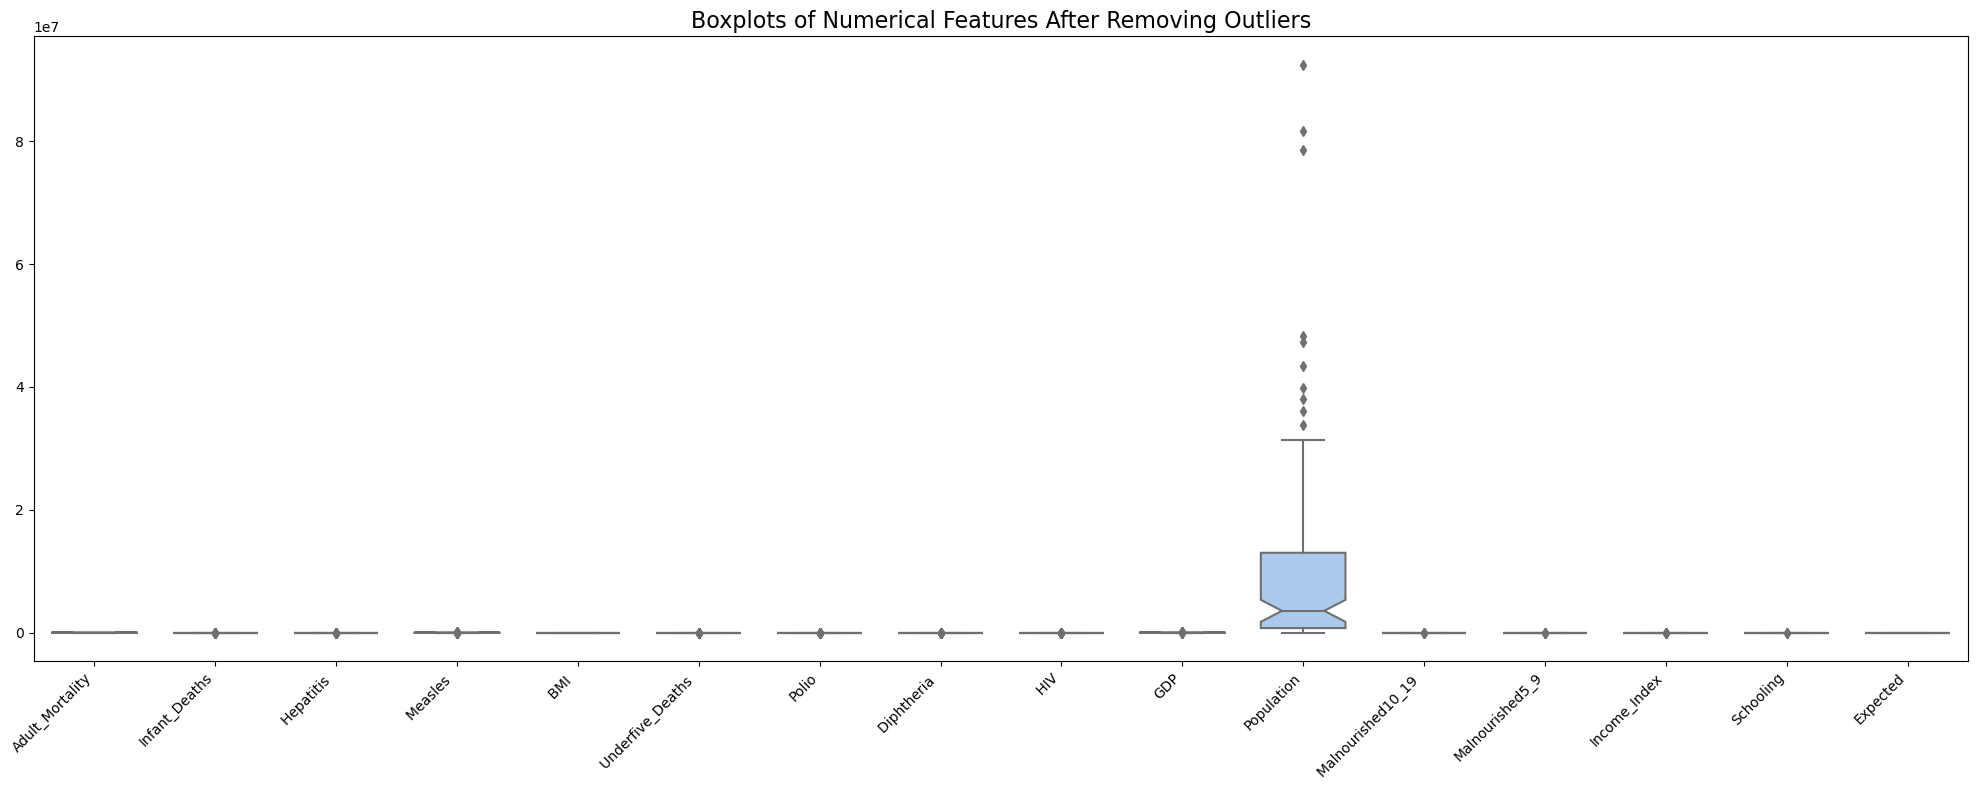

In [267]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_no_outliers[features], palette='pastel', notch=True, width=0.7)
plt.title('Boxplots of Numerical Features After Removing Outliers', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [268]:
df_no_outliers.shape

(116, 17)

### Missing Value analysis and treatment

In [269]:

Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Infant_Deaths,14,11.290323
Hepatitis,5,4.032258
Schooling,5,4.032258
Underfive_Deaths,5,4.032258
Income_Index,3,2.419355
Status,0,0.000000
GDP,0,0.000000
Malnourished5_9,0,0.000000
Malnourished10_19,0,0.000000
Population,0,0.000000


### Missing Value Imputation

In [270]:
#Missing value imputation using mean
df['Infant_Deaths'].fillna(df['Infant_Deaths'].mean(), inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)
df['Hepatitis '].fillna(df['Hepatitis '].mean(), inplace=True)
df['Underfive_Deaths '].fillna(df['Underfive_Deaths '].mean(), inplace=True)
df['Income_Index'].fillna(df['Income_Index'].mean(), inplace=True)


In [271]:
df.isnull().sum()

Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis             0
Measles               0
 BMI                  0
Underfive_Deaths      0
Polio                 0
Diphtheria            0
 HIV                  0
GDP                   0
Population            0
Malnourished10_19     0
Malnourished5_9       0
Income_Index          0
Schooling             0
Expected              0
dtype: int64

In [272]:
#Adjusting the column names properly
df.columns=['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis', 'Measles', 'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV', 'GDP', 'Population', 'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling', 'Expected']


### Exploratory data analysis

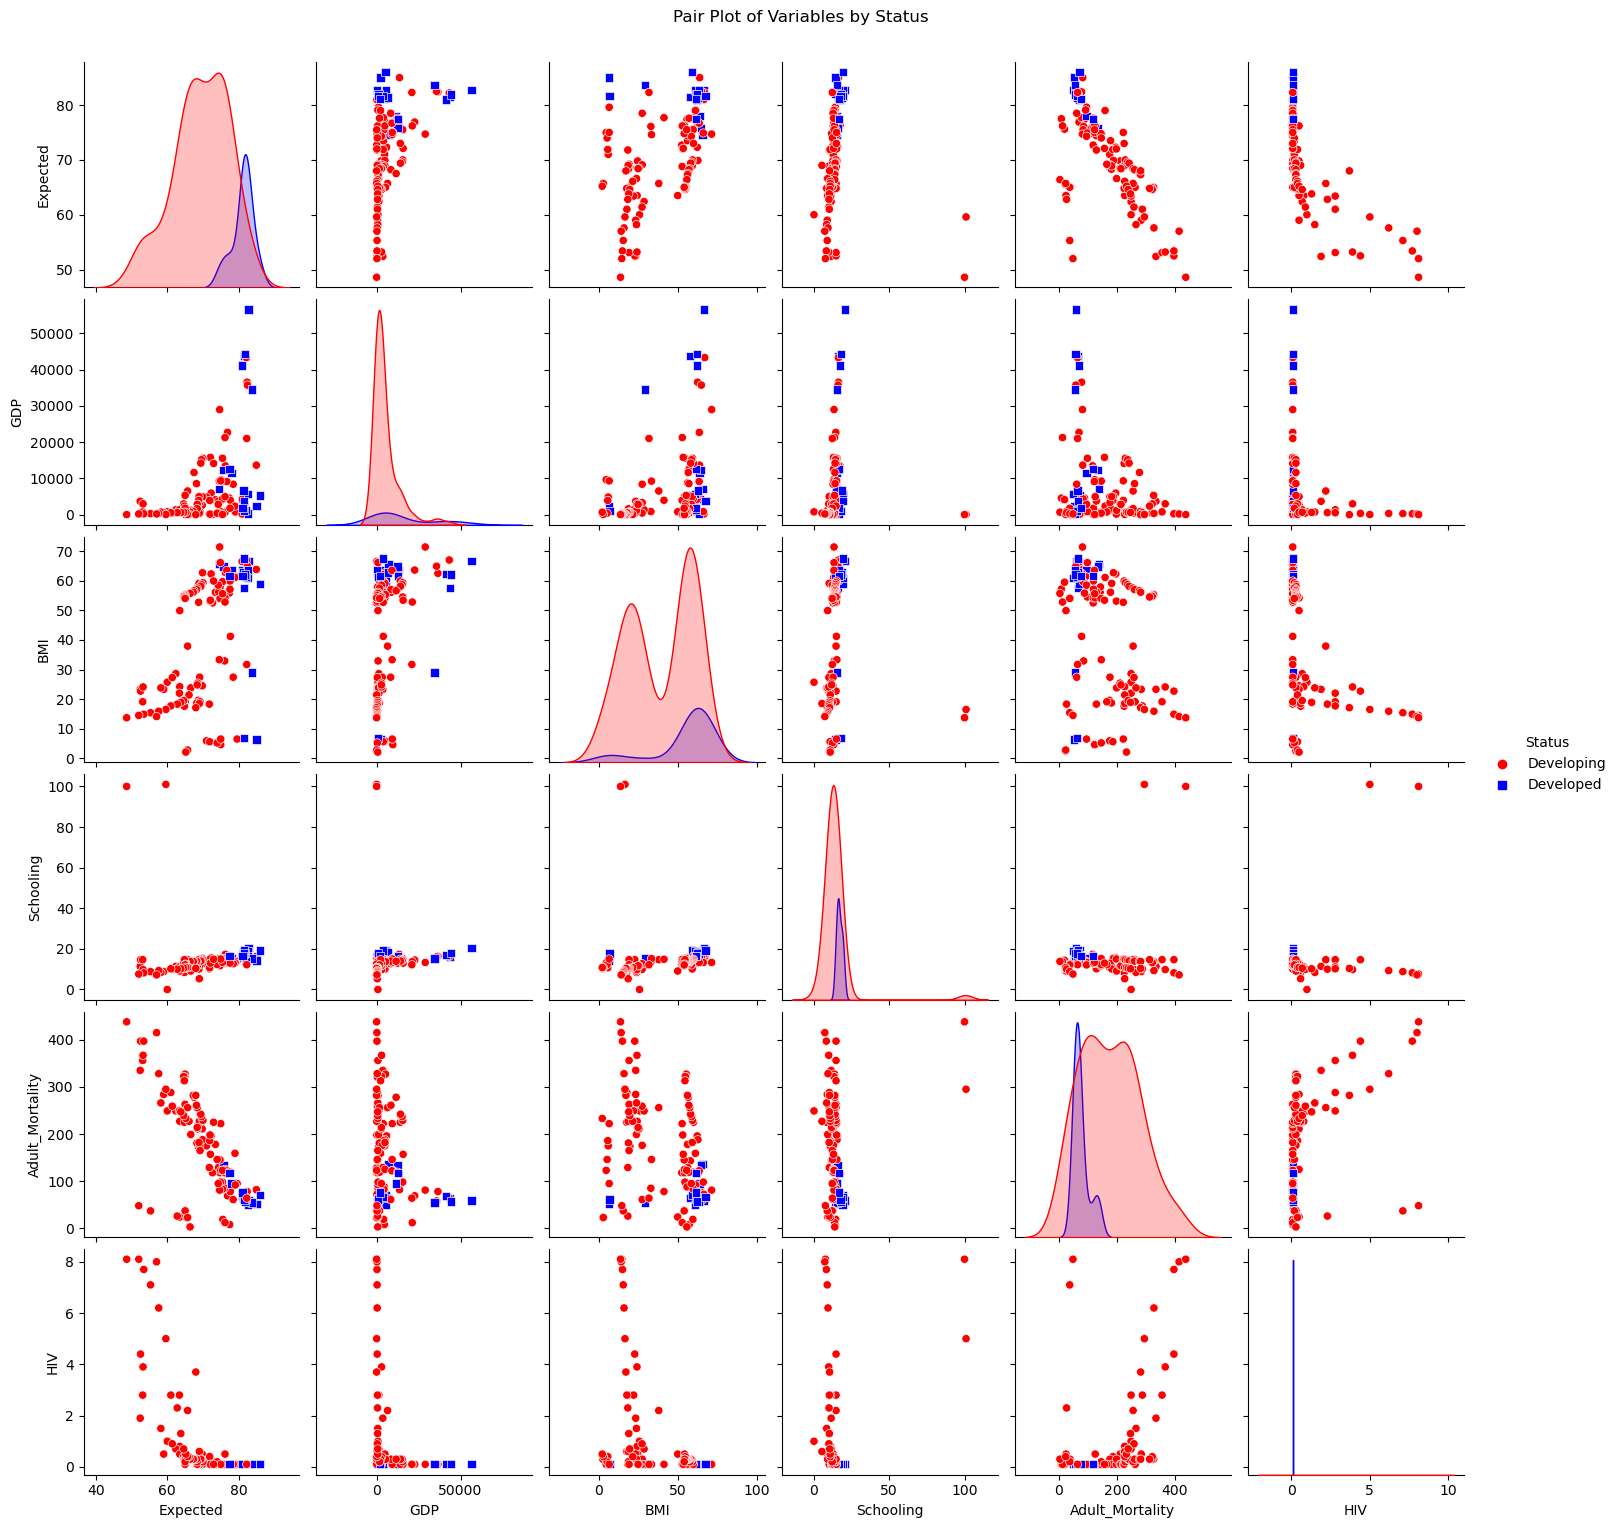

In [444]:
#pairplot
variables = ['Expected', 'GDP', 'BMI', 'Schooling', 'Adult_Mortality', 'Status', 'HIV']


sns.pairplot(df[variables], hue='Status', markers=["o", "s"], palette={"Developed": "blue", "Developing": "red"})
plt.suptitle('Pair Plot of Variables by Status', y=1.02)
plt.show()


#### Distribution of numerical variable across categories

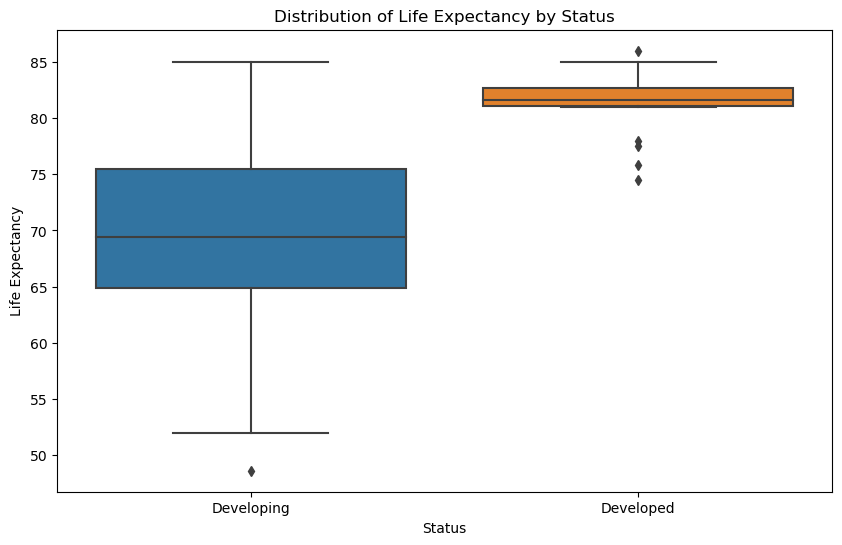

In [274]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Expected', data=df)
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.title('Distribution of Life Expectancy by Status')
plt.show()


##### Life Expectancy across the developed countries tend to have potential outliers compared to developing countries

### Data scaling

In [275]:
# exract numerical cols 

numerical_cols = df.select_dtypes(exclude ='object').columns

In [276]:
numerical_cols

Index(['Adult_Mortality', 'Infant_Deaths', 'Hepatitis', 'Measles', 'BMI',
       'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Expected'],
      dtype='object')

##### Visualizing numerical columns

<Figure size 1200x800 with 0 Axes>

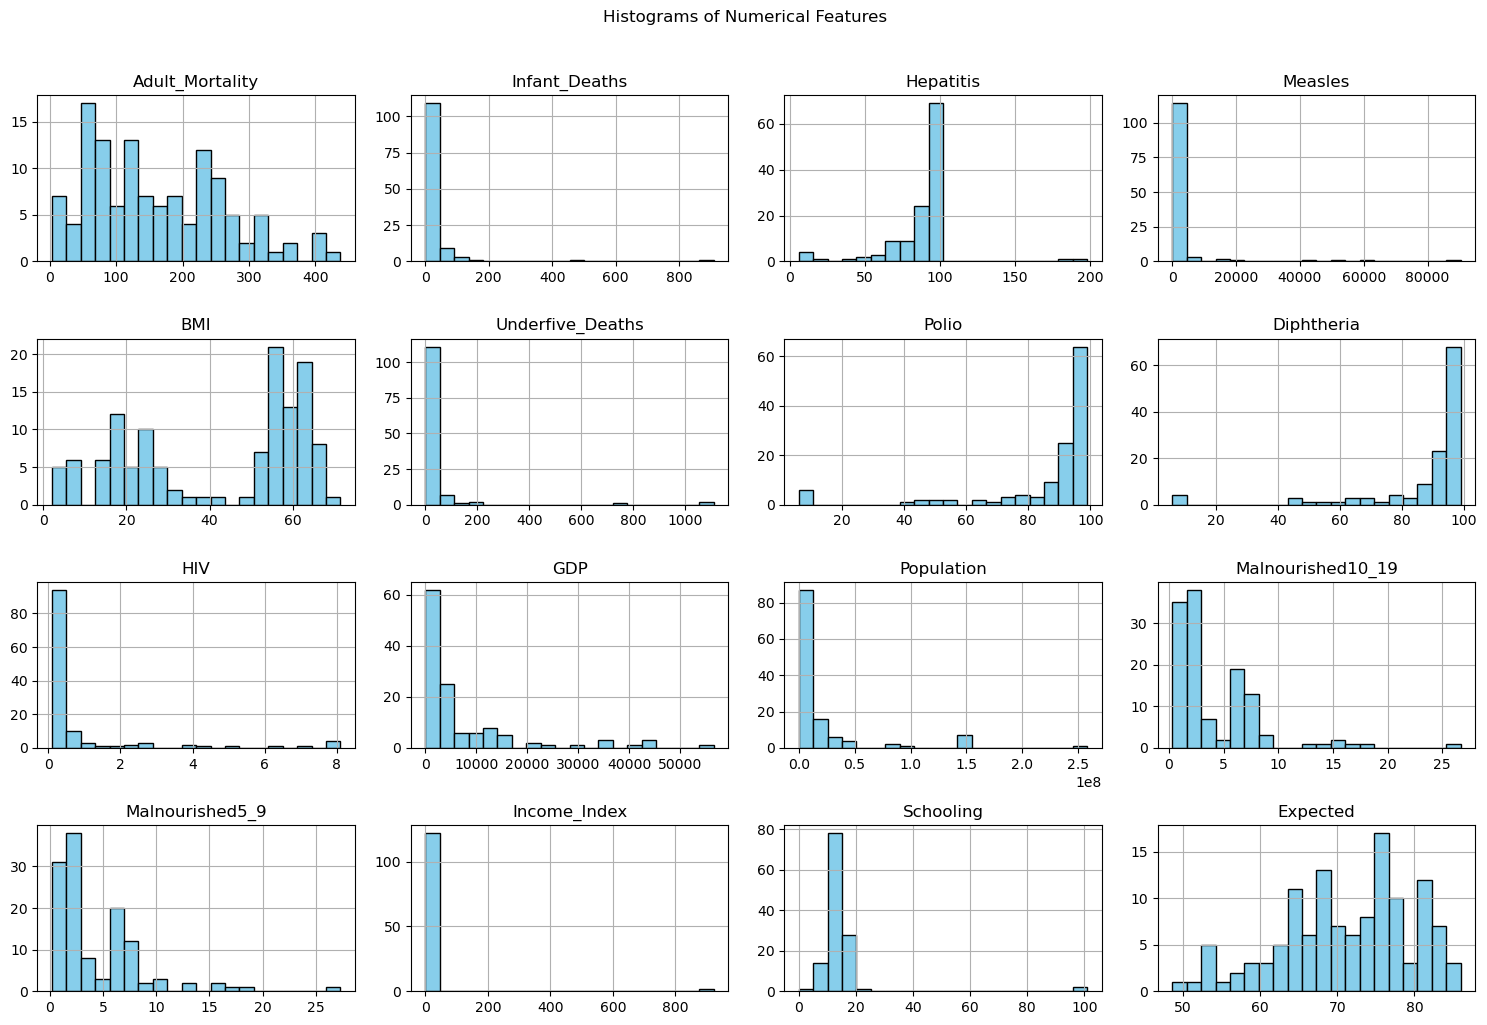

In [277]:
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

In [278]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
df_numeric = df[numerical_cols]
scaler_obj = StandardScaler()
df_numeric_scaled = scaler_obj.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns=numerical_cols)

df_numeric_scaled.head()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,1.011254,0.356266,-0.942447,-0.147121,-1.072655,-0.000000,-3.739110,-1.203393,-0.409423,-0.579504,0.345979,3.198683,3.080864,-0.132816,0.000000,-0.737631
1,-1.503955,-0.303988,0.433897,-0.247722,0.732965,-0.000000,0.526893,0.529290,-0.409423,-0.211327,-0.472973,-0.732305,-0.732496,-0.130383,-0.041341,0.744516
2,-1.395456,-0.080354,0.308775,-0.242230,0.841965,-0.000000,0.387784,0.371773,-0.409423,-0.252190,0.496193,0.446991,0.340012,-0.130538,-0.023771,0.519230
3,1.721431,0.398863,-0.984154,-0.237436,-0.873611,-0.000000,-3.692740,-1.255898,0.615052,-0.292496,-0.411834,1.012071,0.912016,-0.132367,-0.287319,-2.231636
4,-0.438690,-0.218794,0.267067,-0.247722,0.998358,-0.000000,0.295045,0.319267,-0.409423,0.608814,0.583022,-0.781442,-0.827830,-0.129822,0.230992,0.602230


In [280]:
df1 = df_numeric_scaled

### Correlation Analysis using Heat map

In [281]:
correlation_matrix = df1.corr()
correlation_matrix

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Adult_Mortality,1.000000,0.177365,0.097991,0.118974,-0.355814,0.126363,-0.274509,-0.198470,0.467842,-0.312615,0.100014,0.245312,0.275346,-0.127190,0.151934,-0.710868
Infant_Deaths,0.177365,1.000000,-0.092250,0.851649,-0.222146,0.812317,-0.168268,-0.148588,0.095029,-0.128464,0.017680,0.463474,0.470328,-0.037351,-0.053286,-0.225741
Hepatitis,0.097991,-0.092250,1.000000,-0.091693,-0.059697,-0.065907,0.413006,0.685281,0.167355,0.038003,-0.010647,0.109592,0.022963,0.017488,0.306520,-0.003815
Measles,0.118974,0.851649,-0.091693,1.000000,-0.152164,0.652957,-0.110997,-0.113898,0.008327,-0.090549,0.022807,0.266472,0.337964,-0.031441,-0.056513,-0.125452
BMI,-0.355814,-0.222146,-0.059697,-0.152164,1.000000,-0.218220,0.296805,0.162938,-0.437901,0.389806,0.166865,-0.471861,-0.504309,0.140392,-0.002180,0.539188
Underfive_Deaths,0.126363,0.812317,-0.065907,0.652957,-0.218220,1.000000,-0.112612,-0.111590,0.052861,-0.127021,-0.010417,0.496990,0.502791,-0.035623,-0.056918,-0.171886
Polio,-0.274509,-0.168268,0.413006,-0.110997,0.296805,-0.112612,1.000000,0.642188,-0.082841,0.159077,-0.121309,-0.225484,-0.256457,0.038606,0.072591,0.331566
Diphtheria,-0.198470,-0.148588,0.685281,-0.113898,0.162938,-0.111590,0.642188,1.000000,-0.079025,0.156255,0.041571,-0.033914,-0.139628,0.035060,0.066018,0.293787
HIV,0.467842,0.095029,0.167355,0.008327,-0.437901,0.052861,-0.082841,-0.079025,1.000000,-0.226209,-0.124122,0.245843,0.228223,-0.052942,0.295155,-0.678452
GDP,-0.312615,-0.128464,0.038003,-0.090549,0.389806,-0.127021,0.159077,0.156255,-0.226209,1.000000,0.042159,-0.259829,-0.279711,0.435396,0.039473,0.463379


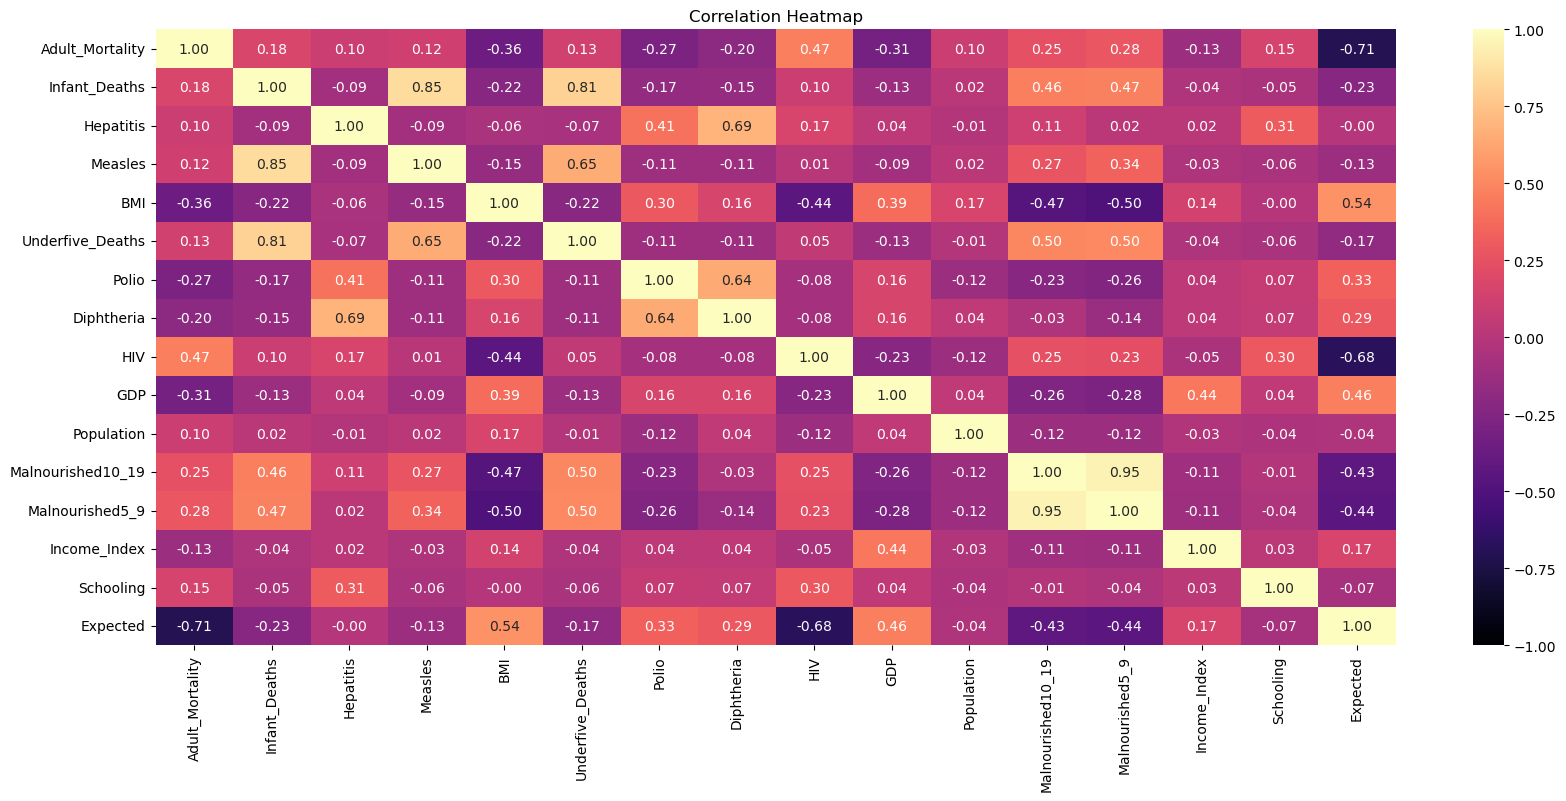

In [282]:
#Visualizing 
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

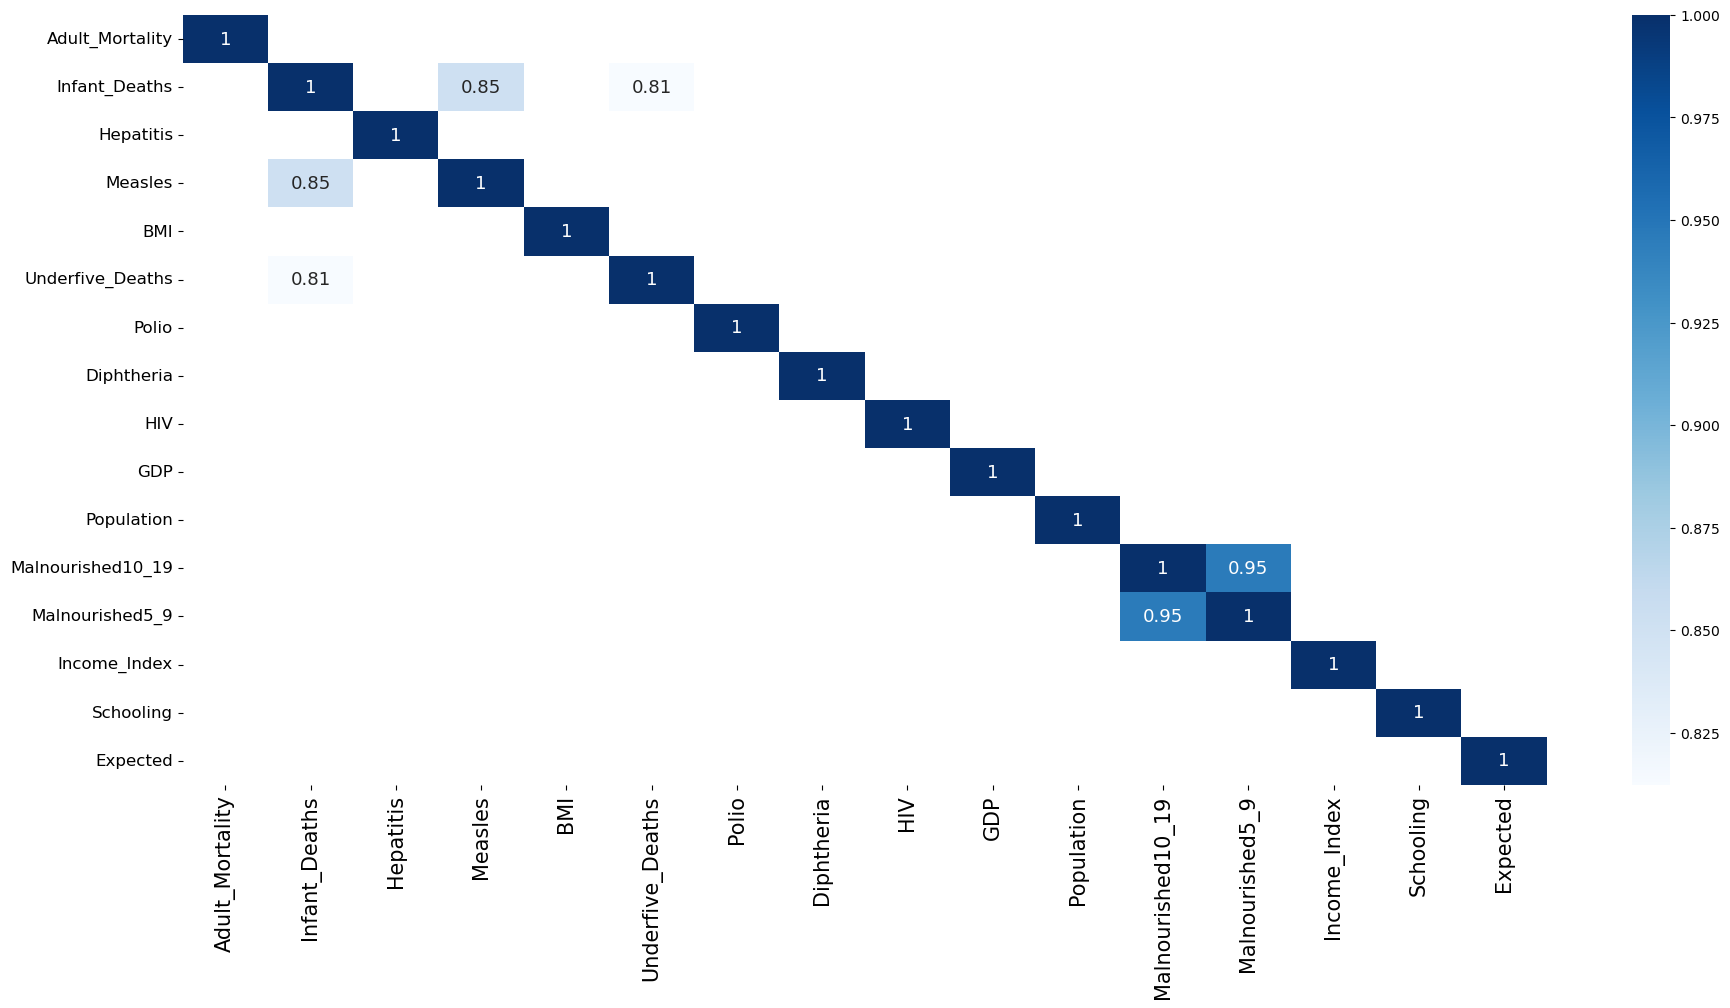

In [283]:
plt.figure(figsize = (22,10))
sns.heatmap(df1.corr()[np.abs(df1.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')
plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)
plt.show()

In [284]:
def correlation(df, threshold):
    new_cols = set()
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colsname = correlation_matrix.columns[i]
                new_cols.add(colsname)
    return new_cols

In [285]:
correlation(df, 0.75)

{'Malnourished5_9', 'Measles', 'Underfive_Deaths'}

#### Variance Inflation factor 

In [286]:
df_numeric_features_vif = df1.select_dtypes(include=[np.number])

df_numeric_features_vif.head()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,1.011254,0.356266,-0.942447,-0.147121,-1.072655,-0.000000,-3.739110,-1.203393,-0.409423,-0.579504,0.345979,3.198683,3.080864,-0.132816,0.000000,-0.737631
1,-1.503955,-0.303988,0.433897,-0.247722,0.732965,-0.000000,0.526893,0.529290,-0.409423,-0.211327,-0.472973,-0.732305,-0.732496,-0.130383,-0.041341,0.744516
2,-1.395456,-0.080354,0.308775,-0.242230,0.841965,-0.000000,0.387784,0.371773,-0.409423,-0.252190,0.496193,0.446991,0.340012,-0.130538,-0.023771,0.519230
3,1.721431,0.398863,-0.984154,-0.237436,-0.873611,-0.000000,-3.692740,-1.255898,0.615052,-0.292496,-0.411834,1.012071,0.912016,-0.132367,-0.287319,-2.231636
4,-0.438690,-0.218794,0.267067,-0.247722,0.998358,-0.000000,0.295045,0.319267,-0.409423,0.608814,0.583022,-0.781442,-0.827830,-0.129822,0.230992,0.602230


#### Calculate the VIF for each numeric variable

In [287]:
# create an empty dataframe to store the VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,14.420805,Malnourished10_19
1,13.537113,Malnourished5_9
2,7.589070,Infant_Deaths
3,4.712845,Measles
4,4.445146,Expected
5,3.385983,Diphtheria
6,3.235327,Underfive_Deaths
7,2.487875,Hepatitis
8,2.424144,HIV
9,2.231290,Adult_Mortality


In [288]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor          Features
0     2.181382   Adult_Mortality
1     6.654813     Infant_Deaths
2     2.469625         Hepatitis
3     3.831447           Measles
4     1.859599               BMI
5     3.233666  Underfive_Deaths
6     2.030823             Polio
7     3.103472        Diphtheria
8     2.423970               HIV
9     1.626981               GDP
10    1.193680        Population
11    1.947199   Malnourished5_9
12    1.245022      Income_Index
13    1.296947         Schooling
14    4.372346          Expected


Here we have dropped the column Malnourished10_19 which was having VIF factor of 14.284448 and is highly correlated

In [319]:
df_numeric_features_vif.head()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished5_9,Income_Index,Schooling,Expected
0,1.011254,0.356266,-0.942447,-0.147121,-1.072655,-0.000000,-3.739110,-1.203393,-0.409423,-0.579504,0.345979,3.080864,-0.132816,0.000000,-0.737631
1,-1.503955,-0.303988,0.433897,-0.247722,0.732965,-0.000000,0.526893,0.529290,-0.409423,-0.211327,-0.472973,-0.732496,-0.130383,-0.041341,0.744516
2,-1.395456,-0.080354,0.308775,-0.242230,0.841965,-0.000000,0.387784,0.371773,-0.409423,-0.252190,0.496193,0.340012,-0.130538,-0.023771,0.519230
3,1.721431,0.398863,-0.984154,-0.237436,-0.873611,-0.000000,-3.692740,-1.255898,0.615052,-0.292496,-0.411834,0.912016,-0.132367,-0.287319,-2.231636
4,-0.438690,-0.218794,0.267067,-0.247722,0.998358,-0.000000,0.295045,0.319267,-0.409423,0.608814,0.583022,-0.827830,-0.129822,0.230992,0.602230


In [320]:
# copy the data set to a new variable df2 
df_numeric_features_vif.shape

(124, 15)

In [321]:
# Removing unneccessary columns

df_numeric_features_vif.drop(['Infant_Deaths','Underfive_Deaths','Malnourished5_9'],axis=1,inplace=True)

In [322]:
df_numeric_features_vif.shape

(124, 12)

In [344]:
# Assuming you have created a new DataFrame df_encoded with one-hot encoding
categorical_cols = df.iloc[:,0]

categorical_cols_encoding = pd.get_dummies(categorical_cols)

# Now, you can convert the one-hot encoded columns to integer type
#df_encoded['Status_Developed'] = df_encoded['Status_Developed'].astype(int)
#df_encoded['Status_Developing'] = df_encoded['Status_Developing'].astype(int)


In [345]:
categorical_cols_encoding.head(3)

,Developed,Developing
0,0,1
1,0,1
2,0,1


In [346]:
df2 = pd.concat([categorical_cols_encoding,df_numeric_features_vif],axis=1)

In [347]:
df2.head(3)

,Developed,Developing,Adult_Mortality,Hepatitis,Measles,BMI,Polio,Diphtheria,HIV,GDP,Population,Income_Index,Schooling,Expected
0,0,1,1.011254,-0.942447,-0.147121,-1.072655,-3.739110,-1.203393,-0.409423,-0.579504,0.345979,-0.132816,0.000000,-0.737631
1,0,1,-1.503955,0.433897,-0.247722,0.732965,0.526893,0.529290,-0.409423,-0.211327,-0.472973,-0.130383,-0.041341,0.744516
2,0,1,-1.395456,0.308775,-0.242230,0.841965,0.387784,0.371773,-0.409423,-0.252190,0.496193,-0.130538,-0.023771,0.519230


In [348]:
df2.dtypes

Developed            uint8
Developing           uint8
Adult_Mortality    float64
Hepatitis          float64
Measles            float64
BMI                float64
Polio              float64
Diphtheria         float64
HIV                float64
GDP                float64
Population         float64
Income_Index       float64
Schooling          float64
Expected           float64
dtype: object

In [349]:
#converting developing and developed dtypes from uint8

df2['Developed'] = df2['Developed'].astype('int64')
df2['Developing'] = df2['Developing'].astype('int64')

In [350]:
df2.head(3)

,Developed,Developing,Adult_Mortality,Hepatitis,Measles,BMI,Polio,Diphtheria,HIV,GDP,Population,Income_Index,Schooling,Expected
0,0,1,1.011254,-0.942447,-0.147121,-1.072655,-3.739110,-1.203393,-0.409423,-0.579504,0.345979,-0.132816,0.000000,-0.737631
1,0,1,-1.503955,0.433897,-0.247722,0.732965,0.526893,0.529290,-0.409423,-0.211327,-0.472973,-0.130383,-0.041341,0.744516
2,0,1,-1.395456,0.308775,-0.242230,0.841965,0.387784,0.371773,-0.409423,-0.252190,0.496193,-0.130538,-0.023771,0.519230


### Splitting the data sets

#### Splitting into training and test sets

In [351]:
X = df2.drop(columns='Expected')
y = df2['Expected']

### Building Model - Linear regression

In [359]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("X_Train:",X_train.shape)
print("Y_Train:",y_train.shape)
print("X_Test:",X_test.shape)
print("Y_Test:",y_test.shape)

X_Train: (86, 13)
Y_Train: (86,)
X_Test: (38, 13)
Y_Test: (38,)


In [385]:
Full_model=sm.OLS(y_train,X_train).fit()

print(Full_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     24.01
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.21e-20
Time:                        20:46:57   Log-Likelihood:                -54.285
No. Observations:                  86   AIC:                             134.6
Df Residuals:                      73   BIC:                             166.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Developed           0.4350      0.175     

In [360]:
linear_model = LinearRegression()

In [362]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [363]:
y_pred_encoded = linear_model.predict(X_test)

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [370]:
# Evaluate the model
full_mae_encoded = mean_absolute_error(y_test, y_pred_encoded)
full_mse_encoded = mean_squared_error(y_test, y_pred_encoded)
full_r2_encoded = r2_score(y_test, y_pred_encoded)

# Print the evaluation metrics for the encoded data
print(f'Mean Absolute Error full: {mae_encoded}')
print(f'Mean Squared Error full: {mse_encoded}')
print(f'R-squared full: {r2_encoded}')

Mean Absolute Error full: 0.40030187398981715
Mean Squared Error full: 0.2722345159380655
R-squared full: 0.7123877309015914


### Inference:

1. The MAE of approximately 0.40 indicates that, on average, the model's predictions differ from the actual values by around 0.40 units. 

2. The MSE of approximately 0.27 is the average of the squared differences between predicted and actual values. 

3. The R-squared value of approximately 0.71 suggests that the model explains about 71% of the variance in the target variable

### Visualization of Predicted vs Actual

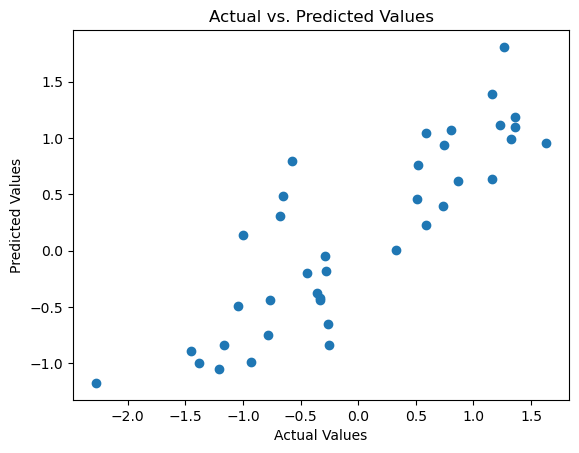

In [367]:
plt.scatter(y_test, y_pred_encoded)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

#### Feature Importance

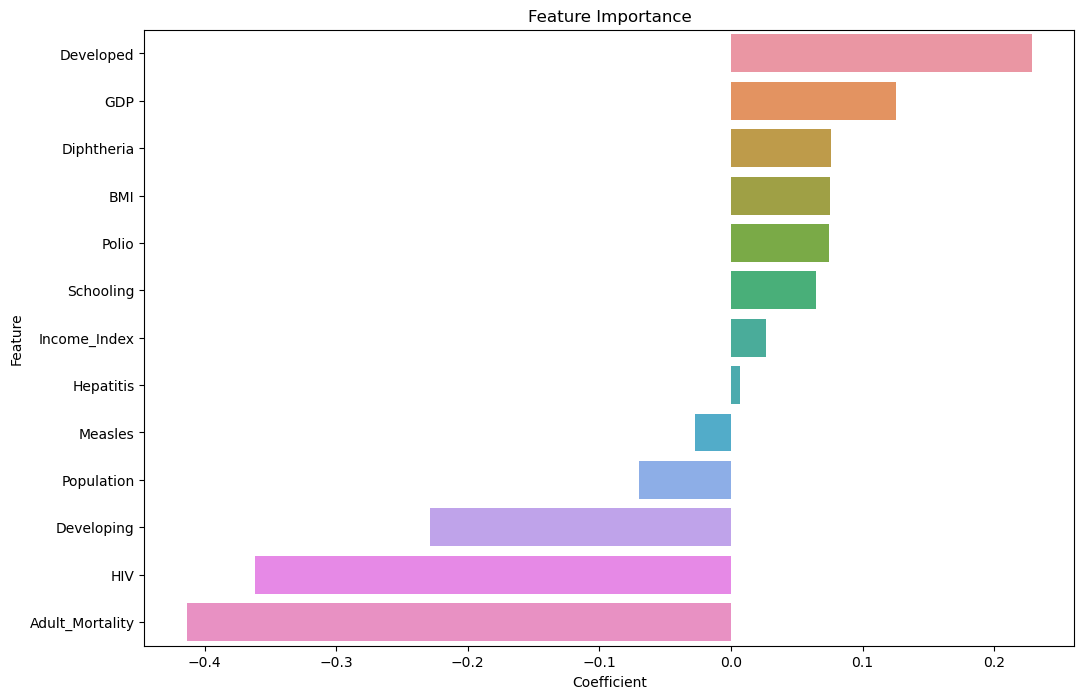

In [369]:
coefficients = linear_model.coef_
feature_names = X_train.columns

# Creating a dataframe with coefficients and feature names
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting the dataframe by coefficient values
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [386]:
p_values = Full_model.pvalues

alpha = 0.05

p_values[p_values<alpha]

Developed         0.015289
Adult_Mortality   0.000001
HIV               0.000002
dtype: float64

In [387]:
variance=df2.var()

threshold =0.1

variance[variance<threshold]

Series([], dtype: float64)

### Performing Linear regression on significant variables

In [391]:
from sklearn.feature_selection import RFE,RFECV
model = LinearRegression()

selector = RFECV(model, step=1, cv=5)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]

<Axes: >

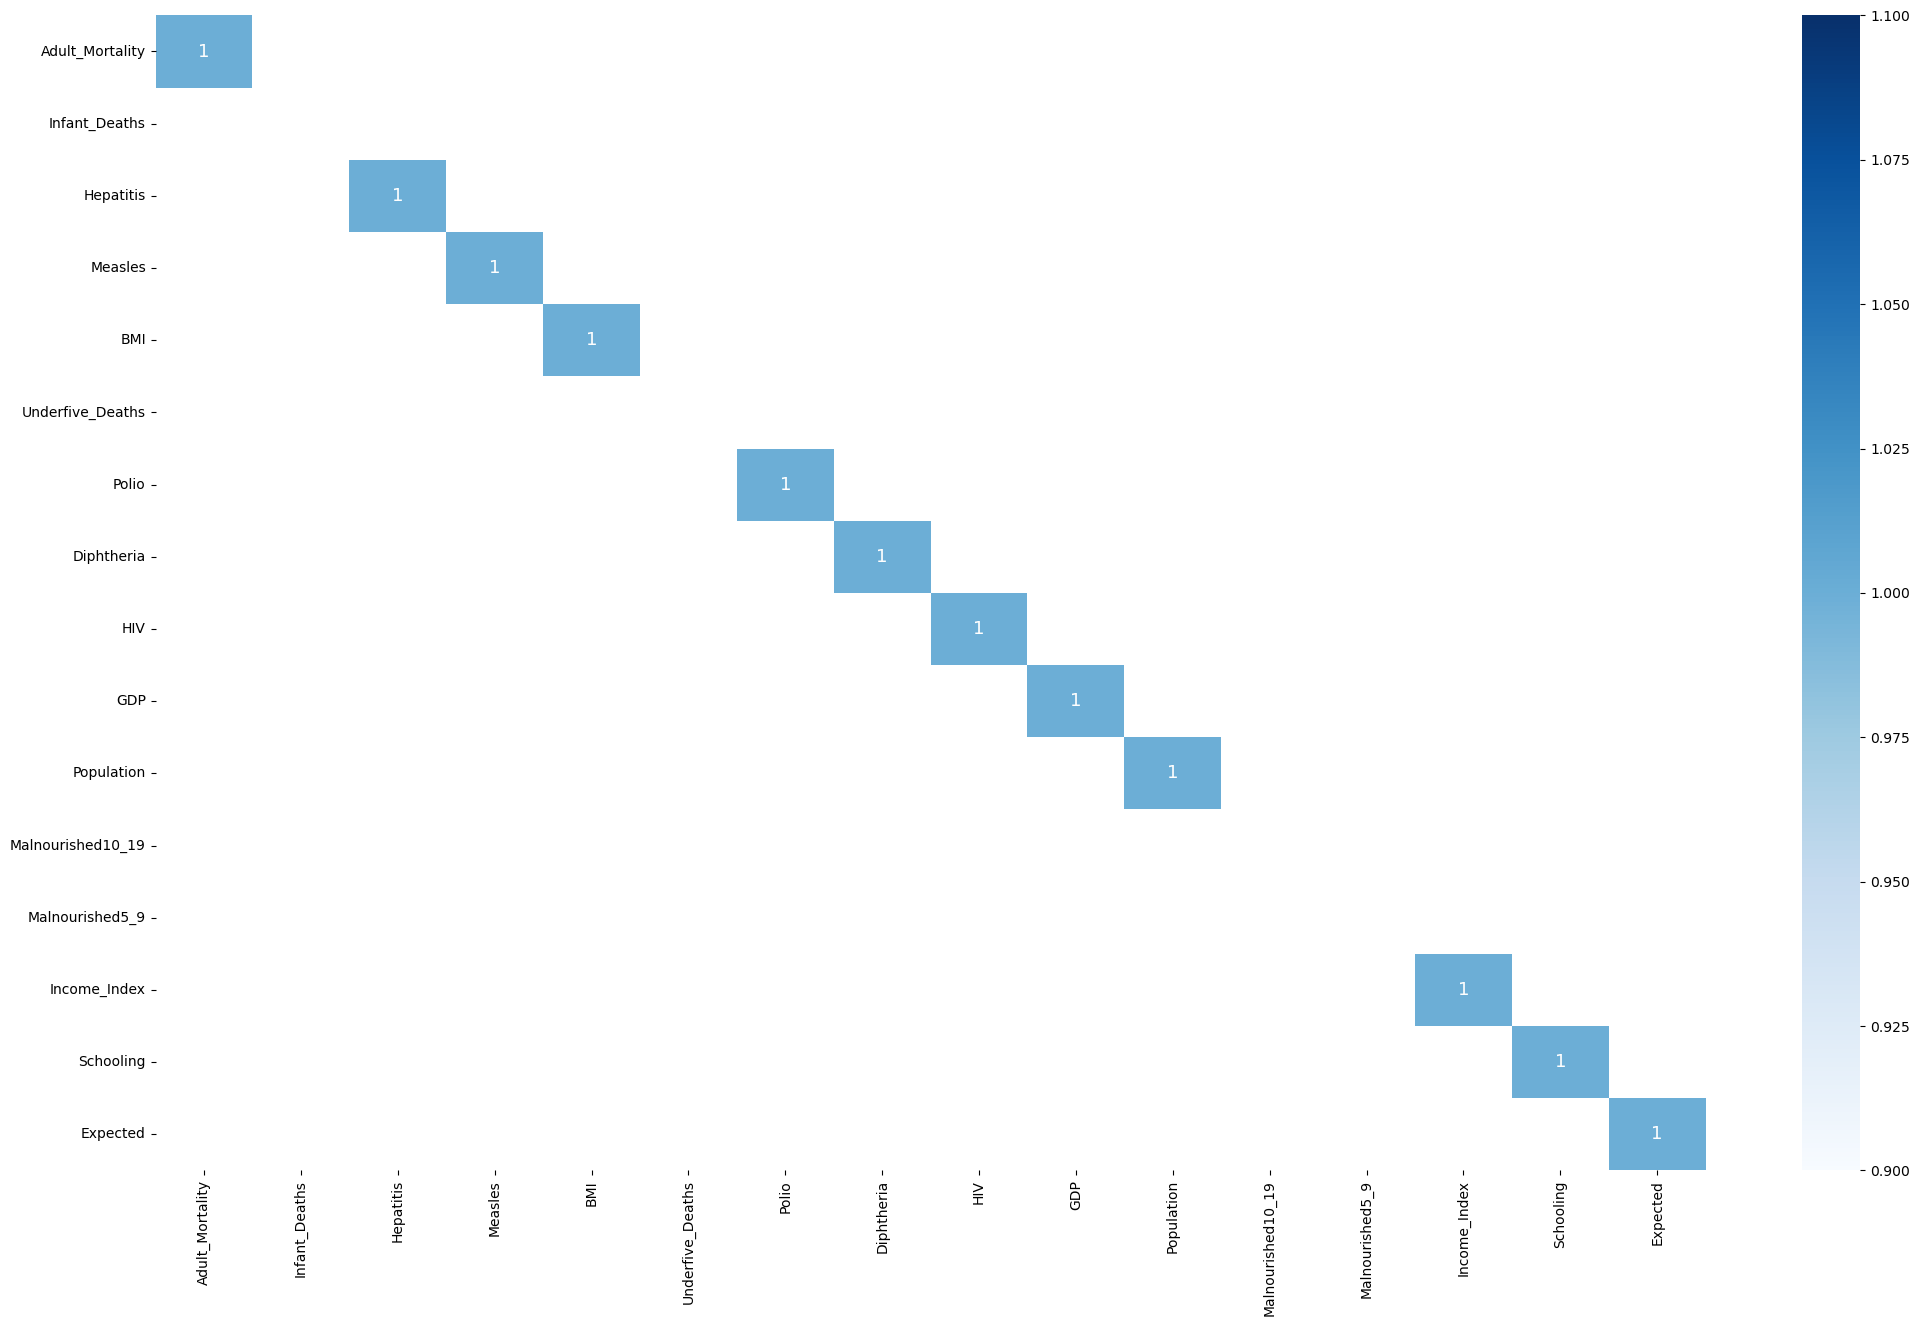

In [393]:
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix.corr()[np.abs(df2.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')

In [397]:
model = LinearRegression()

selector = RFECV(model, step=1, cv=5)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]

In [398]:
selected_features

Index(['Developed', 'Developing', 'Adult_Mortality', 'Diphtheria', 'HIV',
       'GDP'],
      dtype='object')

In [400]:
X_selected = df2.loc[:,selected_features]
y_selected = df2['Expected']
X_with_const = sm.add_constant(X_selected)



X_train_signi,x_test_signi,y_train_signi,y_test_signi  = train_test_split(X_with_const,y_selected,random_state=1,test_size=0.3)

print("X_Train:",X_train_signi.shape)
print("Y_Train:",y_train_signi.shape)
print("X_Test:",x_test_signi.shape)
print("Y_Test:",y_test_signi.shape)

X_Train: (86, 7)
Y_Train: (86,)
X_Test: (38, 7)
Y_Test: (38,)


In [403]:
#Build using OLS model

model_significant = sm.OLS(y_train_signi, X_train_signi).fit()

In [404]:
print(model_significant.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     57.31
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           5.04e-25
Time:                        20:53:44   Log-Likelihood:                -57.582
No. Observations:                  86   AIC:                             127.2
Df Residuals:                      80   BIC:                             141.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1530      0.055     

In [405]:
# Make predictions on the test set
y_pred_signi = lm_model_signi.predict(x_test_signi)

In [406]:

# Evaluate the performance of the model
mae_signi = mean_absolute_error(y_test_signi, y_pred_signi)
mse_signi = mean_squared_error(y_test_signi, y_pred_signi)
r2_signi = r2_score(y_test_signi, y_pred_signi)

print(f"Mean Absolute Error (Selected): {mae_signi}")
print(f"Mean Squared Error (Selected): {mse_signi}")
print(f"R-squared (Selected): {r2_signi}")

Mean Absolute Error (Selected): 0.39266901210708127
Mean Squared Error (Selected): 0.2994329892252791
R-squared (Selected): 0.683652893251807


In [412]:
columns = ['Model Name', 'R2-score', 'MSE' , 'MAE']
model_summary_stats = pd.DataFrame(columns=columns)
def SummaryTable(model_name,r_sq,mse,mae):
    global model_summary_stats
    new_row = pd.DataFrame([[model_name,r_sq,mse,mae]],columns=columns)
    model_summary_stats=pd.concat([model_summary_stats,new_row])
    return model_summary_stats

In [413]:
SummaryTable('Linear Regression Full',full_r2_encoded,full_mse_encoded,full_mae_encoded)

,Model Name,R2-score,MSE,MAE
0,Linear Regression Full,0.712388,0.272235,0.400302


### Residual calculation

In [419]:
residuals_lr = y_test_signi - model_significant.predict(x_test_signi)


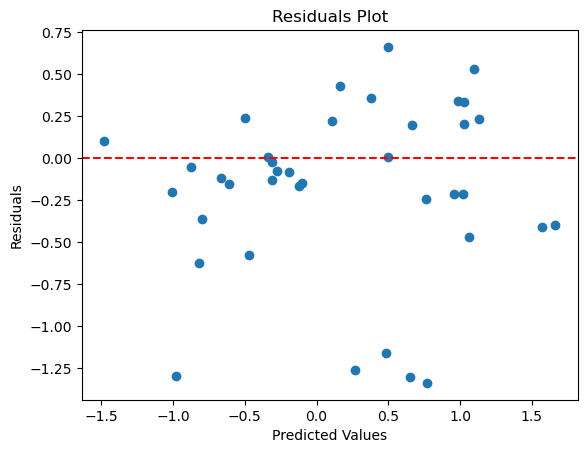

In [420]:
#reidual plot
plt.scatter(model_significant.predict(x_test_signi), residuals_lr)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.show()

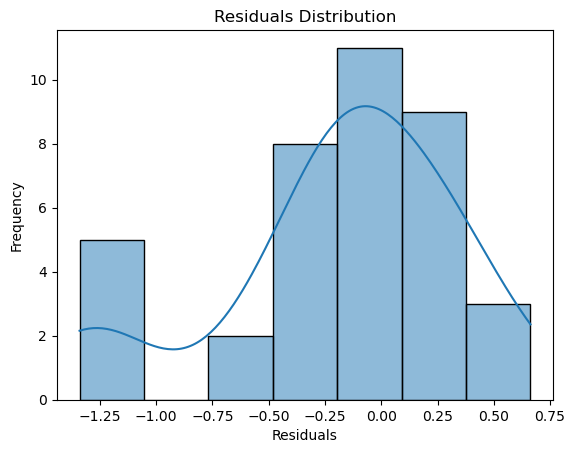

In [421]:
# Residual distribution

sns.histplot(residuals_lr, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [423]:
# residuals statistics 
print(residuals_lr.describe())

count   38.000000
mean    -0.188986
std      0.520427
min     -1.340067
25%     -0.389076
50%     -0.125228
75%      0.203988
max      0.662766
dtype: float64


Linear Regression model with the full set of features has a higher R-squared value (0.7124) compared to the model with only significant features (0.6837). The same trend is observed in the Mean Squared Error (MSE) and Mean Absolute Error (MAE), where the full model outperforms the model with significant features.

### Exploring other algorithm 

#### Random Forest without Hyperparameter Tuning

In [424]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (Without Hyperparameter Tuning):", mse)
print("R-squared (Without Hyperparameter Tuning):", r2)
print("Mean Absolute Error (Without Hyperparameter Tuning):", mae)


Mean Squared Error (Without Hyperparameter Tuning): 0.09306745662553184
R-squared (Without Hyperparameter Tuning): 0.9016754275737151
Mean Absolute Error (Without Hyperparameter Tuning): 0.22156385190654185


In [425]:
SummaryTable('RandomForest without hyperparameter tuning',r2,mse,mae)

,Model Name,R2-score,MSE,MAE
0,Linear Regression Full,0.712388,0.272235,0.400302
0,Linear Regression Significant,0.683653,0.299433,0.392669
0,RandomForest without hyperparameter tuning,0.901675,0.093067,0.221564


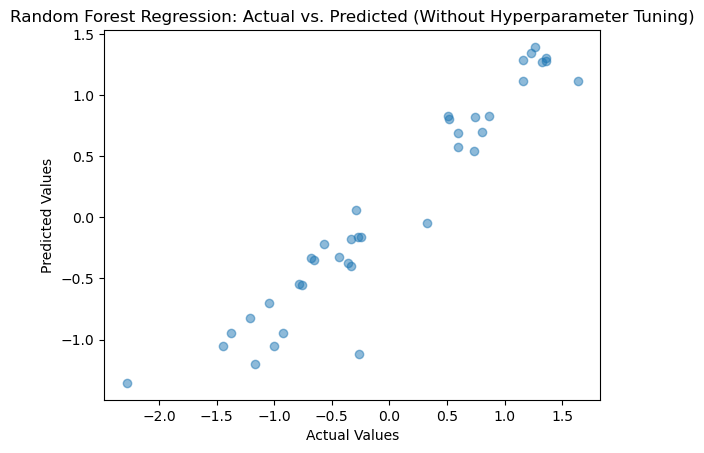

In [426]:
## Visualising
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Random Forest Regression: Actual vs. Predicted (Without Hyperparameter Tuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Random Forest with Hyperparameter tuning

In [427]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}


rf_model_tuned = RandomForestRegressor(random_state=1)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predictions using the best model
y_pred_tuned = grid_search.predict(X_test)

# Evaluation
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print("Mean Squared Error (With Hyperparameter Tuning):", mse_tuned)
print("R-squared (With Hyperparameter Tuning):", r2_tuned)
print("Mean Absolute Error (With Hyperparameter Tuning):", mae_tuned)


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (With Hyperparameter Tuning): 0.08233867268985122
R-squared (With Hyperparameter Tuning): 0.9130102499851013
Mean Absolute Error (With Hyperparameter Tuning): 0.21327670048198938


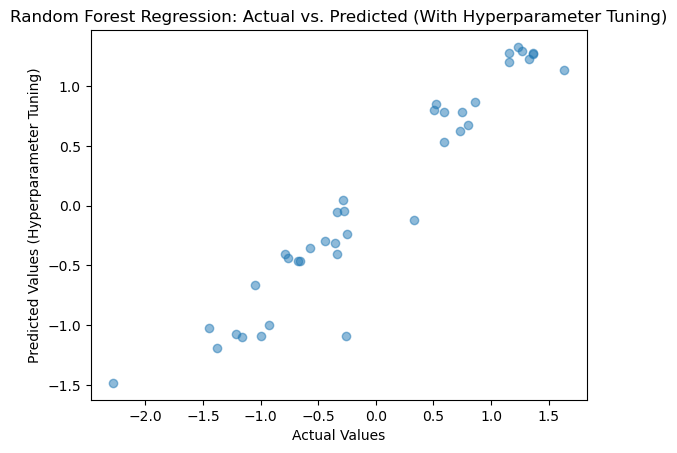

In [429]:
# Visualizing
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.title('Random Forest Regression: Actual vs. Predicted (With Hyperparameter Tuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Hyperparameter Tuning)')
plt.show()

In [430]:
SummaryTable('RandomForest with hyperparameter tuning',r2_tuned,mse_tuned,mae_tuned)

,Model Name,R2-score,MSE,MAE
0,Linear Regression Full,0.712388,0.272235,0.400302
0,Linear Regression Significant,0.683653,0.299433,0.392669
0,RandomForest without hyperparameter tuning,0.901675,0.093067,0.221564
0,RandomForest with hyperparameter tuning,0.913010,0.082339,0.213277


### Performing K-fold - cross - validation

In [432]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your RandomForestRegressor model
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate Mean Squared Error from cross-validation scores
mse_cv = -np.mean(cv_scores)

# Print the cross-validation MSE
print("Cross-Validation Mean Squared Error:", mse_cv)

Cross-Validation Mean Squared Error: 0.251971862345877


In [435]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

            Feature  Importance
8               HIV    0.547406
2   Adult_Mortality    0.221290
11     Income_Index    0.121018
12        Schooling    0.031049
9               GDP    0.021273
4           Measles    0.020342
10       Population    0.009613
5               BMI    0.008278
3         Hepatitis    0.007949
6             Polio    0.006015
7        Diphtheria    0.005597
1        Developing    0.000095
0         Developed    0.000075


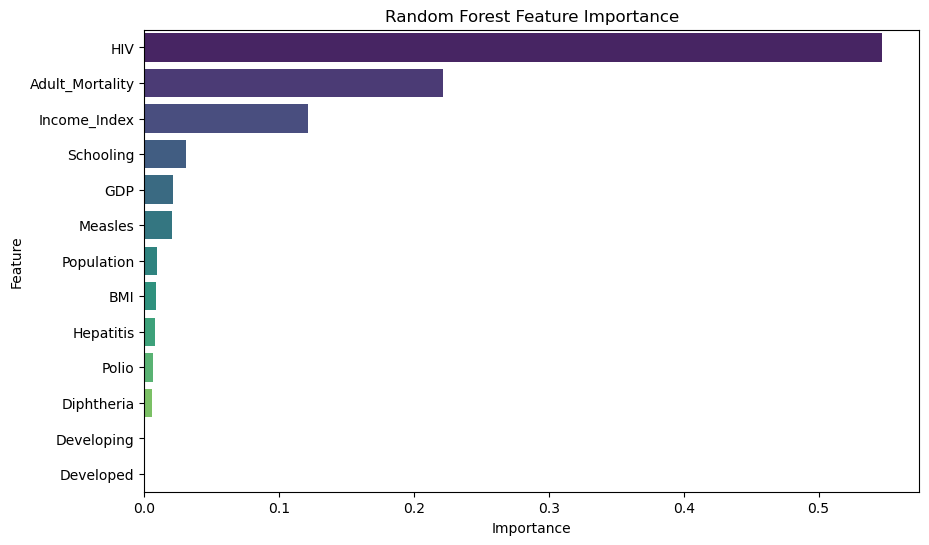

In [434]:
#Visualizing the feature importance 
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Conclusion

Based on the Feature Importance in Random Forest the significant contributors to Life expectancy are

1. HIV - 54%
2. Adult Mortality - 22%
3. Income Index -12%
4. GDP - 21%
5. Schooling - 31%

#### Linear Regression Full Model:

R-squared: 0.7124
Mean Squared Error (MSE): 0.2722
Mean Absolute Error (MAE): 0.4003

#### Linear Regression Significant Features Model:

R-squared: 0.6837
MSE: 0.2994
MAE: 0.3927

#### Random Forest Model without Hyperparameter Tuning:

R-squared: 0.9017
MSE: 0.0931
MAE: 0.2216

#### Random Forest Model with Hyperparameter Tuning:

R2-score: 0.9130
MSE: 0.0823
MAE: 0.2133


1. The Random Forest Model with and without hyperparameter tuning has out performed the Linear regression model in terms of performance metrics like R2, MAE and MSE

2. Hyperparameter tuning further enhances the Random Forest model's performance, resulting in a higher R2-score and lower MSE and MAE

3. The Random Forest model with hyperparameter tuning is the most accurate model among the evaluated models